# Title of ML project 
# Predicting Term Deposit Subscriptions
### (A Machine Learning Approach to Optimize Direct Marketing Campaigns for a Portuguese Banking Institution)

# Name : GOKUL GOPAL

 **Organization:** Entri Elevate


**Date:** JAN-30-2025

# 1 - Overview of Problem Statement:

# The banking sector is increasingly leveraging data-driven strategies to enhance customer engagement and optimize marketing efforts. This project aims to predict whether clients of a Portuguese banking institution will subscribe to a term deposit based on data from direct marketing campaigns conducted via phone calls.

Context
The dataset includes information from marketing campaigns conducted between May 2008 and November 2010, featuring various demographic, financial, and contact-related attributes that may influence a client's decision.

Problem Definition
The primary objective is to classify clients into two categories: those who will subscribe to a term deposit ('yes') and those who will not ('no'). This classification is crucial for the bank to tailor its marketing strategies and improve conversion rates.

Challenges
Imbalanced Classes: The dataset may have an unequal distribution of subscriptions.
Feature Relevance: Identifying key predictive features is essential.
Overfitting: Ensuring the model generalizes well to unseen data.
Interpretability: Understanding the factors influencing client decisions is important for refining marketing strategies.
Goals
Develop an accurate machine learning model for predicting term deposit subscriptions.
Analyze feature impacts on subscription likelihood.
Provide actionable insights to enhance future marketing campaigns.
This project aims to equip the banking institution with a powerful tool for optimizing marketing efforts and improving customer acquisition strategies.


# 2 - Objective
## **To develop an accurate machine learning model for predicting client subscriptions to term deposits based on data from direct marketing campaigns conducted by a Portuguese banking institution.**

# 3 - Data Description

# Source   : UCI Machine Learning Repository (Bank Marketing Dataset)
# Features :
**Age:** Age of the client (integer)

**Job:** Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

**Marital Status:** Marital status of the client (categorical: 'divorced', 'married', 'single', 'unknown')

**Education Level:** Education level of the client (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

**Default:** Whether the client has credit in default (binary: 'yes', 'no')

**Balance:** Average yearly balance in euros (integer)

**Housing Loan:** Whether the client has a housing loan (binary: 'yes', 'no')

**Personal Loan:** Whether the client has a personal loan (binary: 'yes', 'no')

**Contact:** Type of communication used to contact the client (categorical: 'cellular', 'telephone')

**Day of Week:** Last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

**Month:** Last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

**Duration:** Duration of the last contact in seconds (integer)

**Campaign:** Number of contacts performed during this campaign for this client (integer)

**Pdays:** Number of days since the client was last contacted from a previous campaign (-1 means the client was not previously contacted) (integer)

**Previous:** Number of contacts performed before this campaign for this client (integer)

**Poutcome:** Outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**Target Variable (y):** Whether the client subscribed to a term deposit (binary: 'yes', 'no')

### This dataset provides a comprehensive view of client demographics, financial status, and marketing interactions, which are essential for predicting term deposit subscriptions.

# **Data Collection**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('New Dataset Jan25.csv')
df.head()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
print(df.isnull().sum())

age                            0
job                            0
marital                        0
education                      0
credit-default                 0
average yearly balance         0
housing loan                   0
personal loan                  0
communication type             0
last contact day               0
last contact month             0
Last contact duration          0
Phone Calls                    0
previously contacted           0
before- phone calls            0
previous marketing campaign    0
client subscribed              0
dtype: int64


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          45211 non-null  int64 
 1   job                          45211 non-null  object
 2   marital                      45211 non-null  object
 3   education                    45211 non-null  object
 4   credit-default               45211 non-null  object
 5   average yearly balance       45211 non-null  int64 
 6   housing loan                 45211 non-null  object
 7   personal loan                45211 non-null  object
 8   communication type           45211 non-null  object
 9   last contact day             45211 non-null  int64 
 10  last contact month           45211 non-null  object
 11  Last contact duration        45211 non-null  int64 
 12  Phone Calls                  45211 non-null  int64 
 13  previously contacted         45

In [12]:
print(df.describe())

                age  average yearly balance  last contact day  \
count  45211.000000            45211.000000      45211.000000   
mean      40.936210             1362.272058         15.806419   
std       10.618762             3044.765829          8.322476   
min       18.000000            -8019.000000          1.000000   
25%       33.000000               72.000000          8.000000   
50%       39.000000              448.000000         16.000000   
75%       48.000000             1428.000000         21.000000   
max       95.000000           102127.000000         31.000000   

       Last contact duration   Phone Calls  previously contacted  \
count           45211.000000  45211.000000          45211.000000   
mean              258.163080      2.763841             40.197828   
std               257.527812      3.098021            100.128746   
min                 0.000000      1.000000             -1.000000   
25%               103.000000      1.000000             -1.000000   
50%   

# **Data Preprocessing- Data Cleaning**

In [13]:
df.rename(columns={'default':'credit-default',
                  'balance':'average yearly balance',
                   'housing':'housing loan',
                   'loan':'personal loan',
                   'contact':'communication type',
                   'day':'last contact day',
                   'month':'last contact month',
                   'duration':'Last contact duration',
                   'campaign':'Phone Calls',
                   'pdays':'previously contacted',
                   'previous':'before- phone calls',
                   'poutcome':'previous marketing campaign',
                   'y':'client subscribed'}, inplace=True)
df.head()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Exploratory Data Analysis (EDA)**

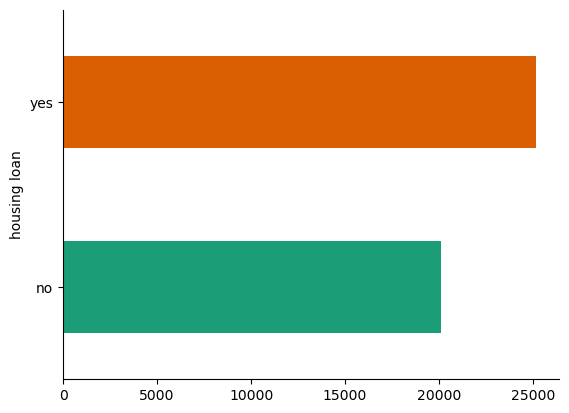

In [14]:
# @title housing loan

df.groupby('housing loan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

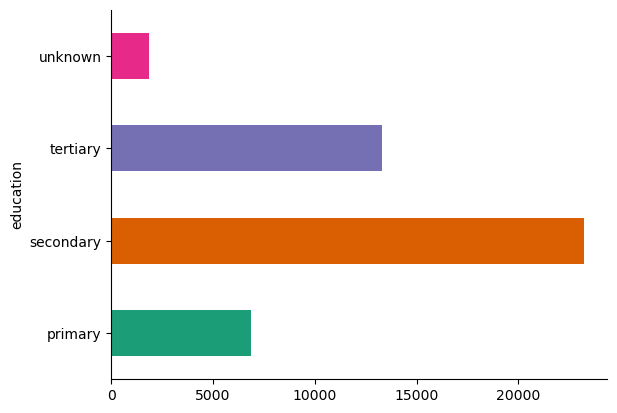

In [15]:
# @title education

df.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

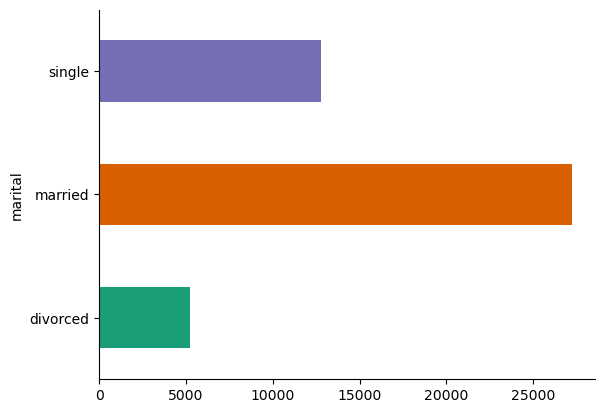

In [16]:
# @title marital

df.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

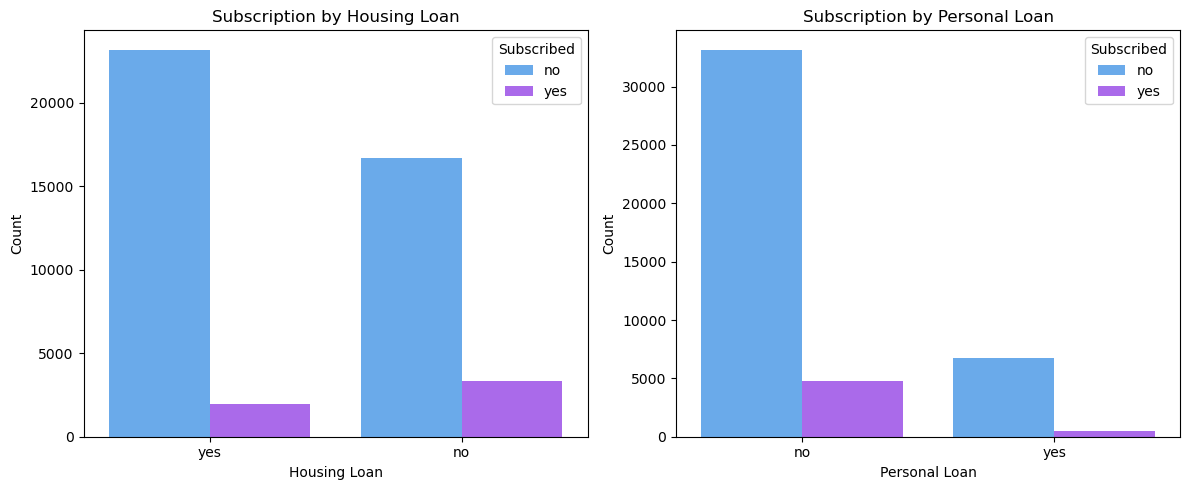

In [17]:
# Plot subscription by loan status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='housing loan', hue='client subscribed', palette='cool', ax=axes[0])
axes[0].set_title('Subscription by Housing Loan')
axes[0].set_xlabel('Housing Loan')
axes[0].set_ylabel('Count')
axes[0].legend(title='Subscribed')

sns.countplot(data=df, x='personal loan', hue='client subscribed', palette='cool', ax=axes[1])
axes[1].set_title('Subscription by Personal Loan')
axes[1].set_xlabel('Personal Loan')
axes[1].set_ylabel('Count')
axes[1].legend(title='Subscribed')

plt.tight_layout()
plt.show()

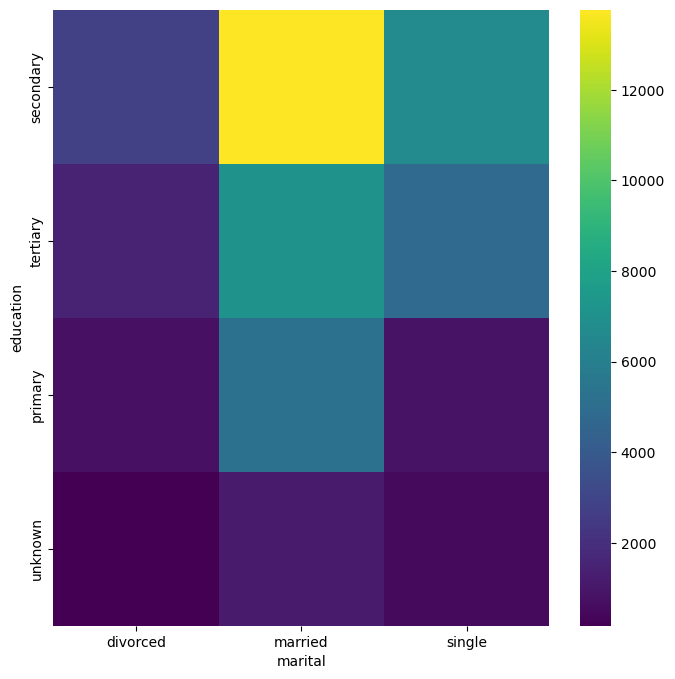

In [18]:
# @title marital vs education

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education'].value_counts()
    for x_label, grp in df.groupby('marital')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital')
_ = plt.ylabel('education')

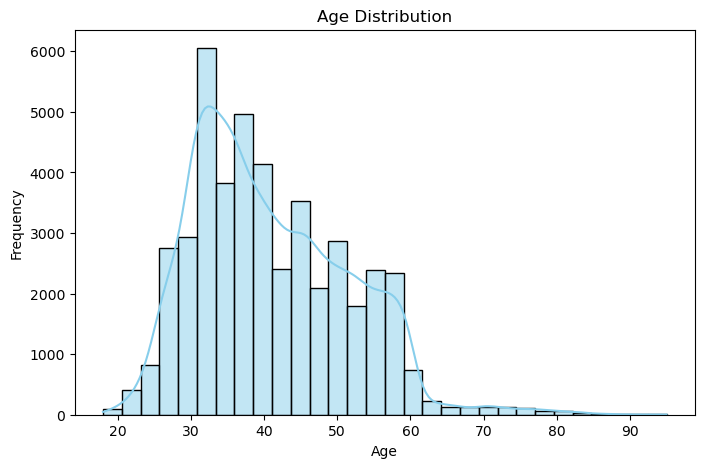

In [19]:
# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\gokul\AppData\Local\Temp\ipykernel_29252\4249029269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='client subscribed', palette='viridis')


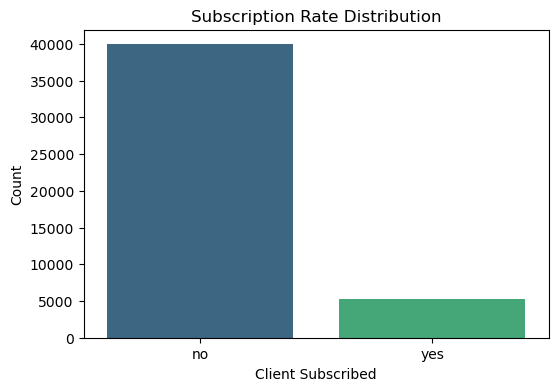

In [20]:
# Plot subscription rates
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='client subscribed', palette='viridis')
plt.title('Subscription Rate Distribution')
plt.xlabel('Client Subscribed')
plt.ylabel('Count')
plt.show()

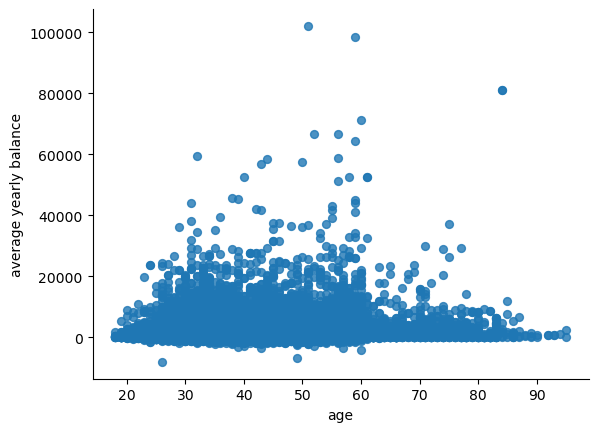

In [21]:
# @title age vs average yearly balance

df.plot(kind='scatter', x='age', y='average yearly balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

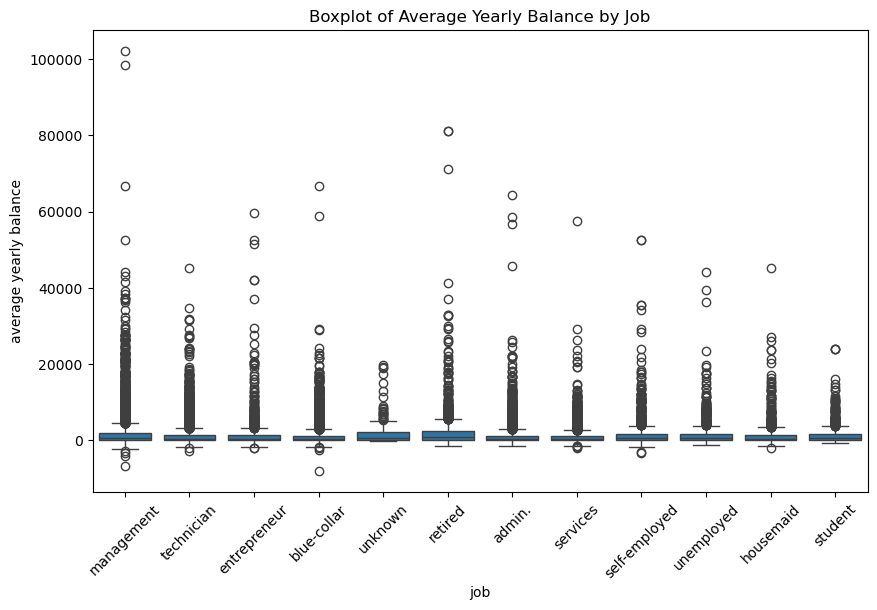

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='average yearly balance', data=df)
plt.title('Boxplot of Average Yearly Balance by Job')
plt.xticks(rotation=45)
plt.show()

C:\Users\gokul\AppData\Local\Temp\ipykernel_29252\464555564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='education', inner='box', palette='Dark2')


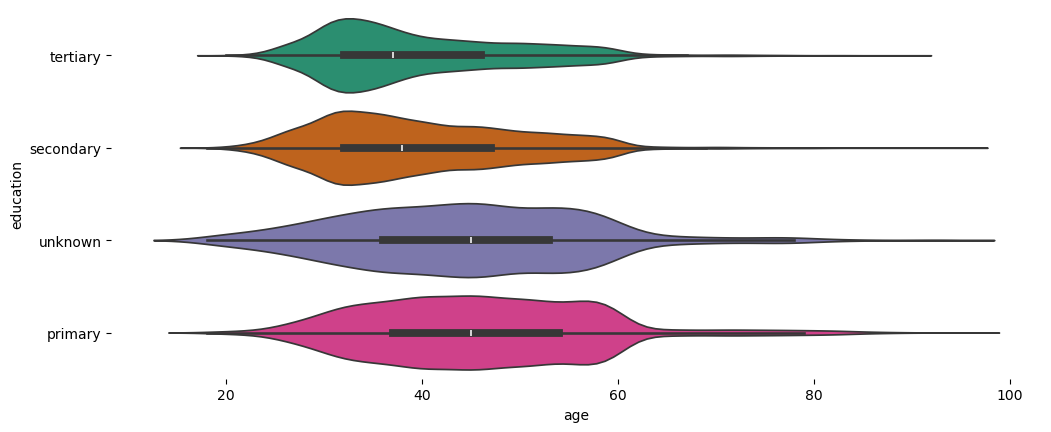

In [23]:
# @title education vs age

figsize = (12, 1.2 * len(df['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='education', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

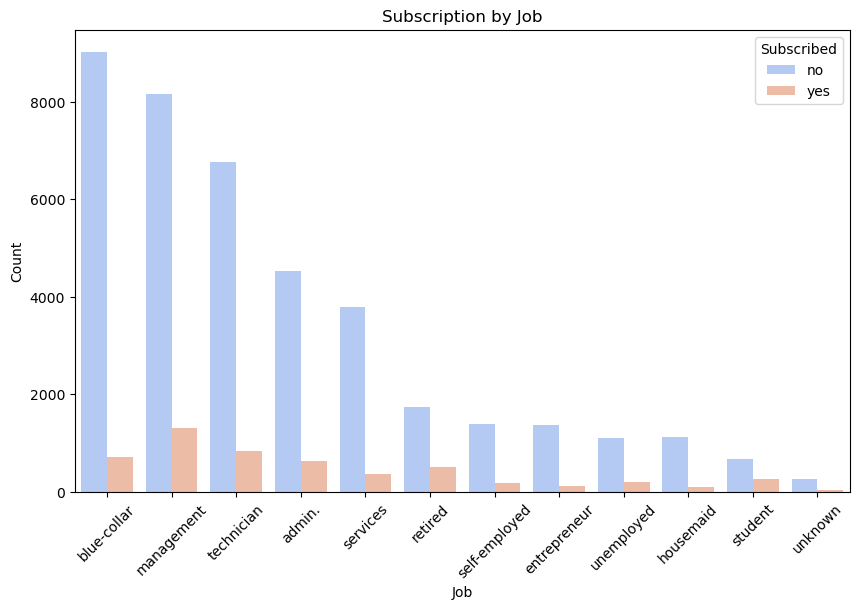

In [24]:
# Plot subscription by job
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', hue='client subscribed', palette='coolwarm', order=df['job'].value_counts().index)
plt.title('Subscription by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.show()


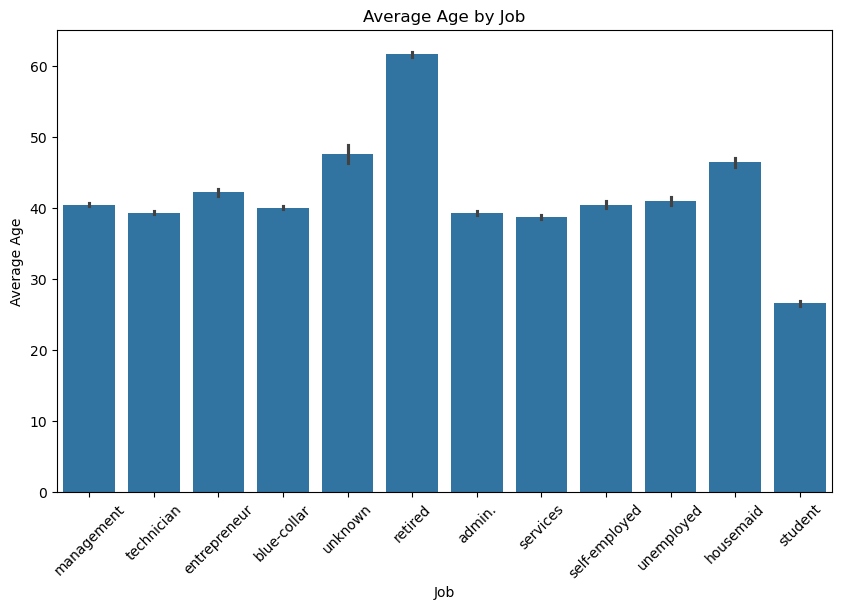

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='job', y='age', data=df)
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

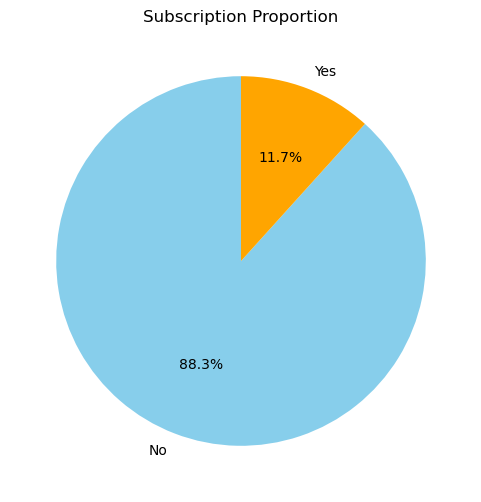

In [26]:
# Pie chart for client subscription
subscription_counts = df['client subscribed'].value_counts()
plt.figure(figsize=(6, 6))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], labels=['No', 'Yes'])
plt.title('Subscription Proportion')
plt.ylabel('')
plt.show()

# **Feature Engineering : Identify and encode categorical features using techniques like one-hot encoding or label encoding.**

In [27]:
from sklearn.preprocessing import LabelEncoder

# Get unique values from a specific column
unique_job = df['job'].unique()
unique_marital = df['marital'].unique()
unique_education = df['education'].unique()
unique_credit_default = df['credit-default'].unique()
unique_housing_loan = df['housing loan'].unique()
unique_loan = df['personal loan'].unique()
unique_communication = df['communication type'].unique()
unique_month = df['last contact month'].unique()
unique_campaign = df['previous marketing campaign'].unique()
unique_client= df['client subscribed'].unique()

df_encoded=df.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

def label_encode(data):
  # Fit and transform the 'Color' column
  data['job']=label_encoder.fit_transform(data['job'])
  data['marital']=label_encoder.fit_transform(data['marital'])
  data['education']=label_encoder.fit_transform(data['education'])
  data['credit-default']=label_encoder.fit_transform(data['credit-default'])
  data['housing loan']=label_encoder.fit_transform(data['housing loan'])
  data['personal loan']=label_encoder.fit_transform(data['personal loan'])
  data['communication type']=label_encoder.fit_transform(data['communication type'])
  data['last contact month'] = label_encoder.fit_transform(data['last contact month'])
  data['previous marketing campaign']=label_encoder.fit_transform(data['previous marketing campaign'])
  data['client subscribed']=label_encoder.fit_transform(data['client subscribed'])
  return data

df_encoded = label_encode(df_encoded)
df_encoded.head()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# **Split Data into Training and Testing Sets and Feature Selection**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Assuming 'client subscribed' is your target variable
X = df_encoded.drop('client subscribed', axis=1)
y = df_encoded['client subscribed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10) # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_selected, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features and their importances
for i in range(len(selected_feature_names)):
    print(f"Feature: {selected_feature_names[i]}, Importance: {feature_importances[i]}")

# You can now use X_train_selected and X_test_selected for further analysis or model training

Feature: education, Importance: 0.036919819844131486
Feature: average yearly balance, Importance: 0.2566838084264536
Feature: housing loan, Importance: 0.030419589871731434
Feature: personal loan, Importance: 0.012422401425855044
Feature: communication type, Importance: 0.025703720116795056
Feature: Last contact duration, Importance: 0.4234798186800494
Feature: Phone Calls, Importance: 0.05430802477770026
Feature: previously contacted, Importance: 0.06956861086126839
Feature: before- phone calls, Importance: 0.027765792458357464
Feature: previous marketing campaign, Importance: 0.06272841353765785


# **Feature Scaling**

In [29]:
from sklearn.preprocessing import MinMaxScaler

def feature_scaling(data):
  numerical_cols = ['average yearly balance','Last contact duration']
  # Initialize the MinMaxScaler
  scaler = MinMaxScaler()
  # Fit and transform the numerical features
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
  return data

df_encoded  = feature_scaling(df_encoded)
df_encoded.head()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
0,58,4,1,2,0,0.092259,1,0,2,5,8,0.053070,1,-1,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,8,0.030704,1,-1,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,8,0.015453,1,-1,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,8,0.018707,1,-1,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,8,0.040260,1,-1,0,3,0


# **Build the ML Model, Model Evaluation, Hyperparameter Tuning, Save the Model**

## **1. Naive Bayes**

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score


# Initialize and train the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_selected)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes: {accuracy_nb}")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_nb = nb_classifier.predict_proba(X_test_selected)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning (example using GridSearchCV - though NB has few)
# param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]} # Example hyperparameter
# grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
# grid_search_nb.fit(X_train_selected, y_train)

# print("Best hyperparameters (Naive Bayes):", grid_search_nb.best_params_)
# best_nb_classifier = grid_search_nb.best_estimator_

# # Evaluate the tuned model
# y_pred_nb_tuned = best_nb_classifier.predict(X_test_selected)
# accuracy_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
# print(f"Accuracy of tuned Naive Bayes: {accuracy_nb_tuned}")
# print(classification_report(y_test, y_pred_nb_tuned))

# Save the Model
joblib.dump(nb_classifier, 'naive_bayes_model.pkl')

## **2. K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Initialize and train the K-Nearest Neighbors model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test_selected)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of K-Nearest Neighbors: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_knn = knn_classifier.predict_proba(X_test_selected)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN)')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning (example using GridSearchCV)
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_selected, y_train)

print("Best hyperparameters (KNN):", grid_search_knn.best_params_)
best_knn_classifier = grid_search_knn.best_estimator_

# Evaluate the tuned model
y_pred_knn_tuned = best_knn_classifier.predict(X_test_selected)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print(f"Accuracy of tuned KNN: {accuracy_knn_tuned}")
print(classification_report(y_test, y_pred_knn_tuned))


# Save the Model
joblib.dump(best_knn_classifier, 'knn_model.pkl')

## **3. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import joblib


# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test_selected)

# Evaluate the model (example using accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy}")

# You can further evaluate with other metrics like precision, recall, F1-score, etc.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob = logreg_classifier.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Hyperparameter Tuning (example using GridSearchCV)
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}  # Example hyperparameters
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

print("Best hyperparameters:", grid_search.best_params_)
best_logreg_classifier = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_logreg_classifier.predict(X_test_selected)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy of tuned Logistic Regression: {accuracy_tuned}")
print(classification_report(y_test, y_pred_tuned))

# Save the Model
joblib.dump(best_logreg_classifier, 'logistic_regression_model.pkl')

## **4. Random Forest**

In [ ]:
# prompt: use   Random Forest,, Build the ML Model, Model Evaluation( Confusion Matrix, Accuracy, Precision, Recall, F1-Score, ROC Curve), Hyperparameter Tuning, Save the Model

# Random Forest Model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_selected, y_train)
y_pred_rf = rf_classifier.predict(X_test_selected)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_rf = rf_classifier.predict_proba(X_test_selected)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning (example using GridSearchCV)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_selected, y_train)

print("Best hyperparameters (Random Forest):", grid_search_rf.best_params_)
best_rf_classifier = grid_search_rf.best_estimator_

# Evaluate the tuned model
y_pred_rf_tuned = best_rf_classifier.predict(X_test_selected)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Accuracy of tuned Random Forest: {accuracy_rf_tuned}")
print(classification_report(y_test, y_pred_rf_tuned))

# Save the Model
joblib.dump(best_rf_classifier, 'random_forest_model.pkl')

## **5. Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test_selected)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting: {accuracy_gb}")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_gb = gb_classifier.predict_proba(X_test_selected)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning (example using GridSearchCV)
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_selected, y_train)

print("Best hyperparameters (Gradient Boosting):", grid_search_gb.best_params_)
best_gb_classifier = grid_search_gb.best_estimator_

# Evaluate the tuned model
y_pred_gb_tuned = best_gb_classifier.predict(X_test_selected)
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
print(f"Accuracy of tuned Gradient Boosting: {accuracy_gb_tuned}")
print(classification_report(y_test, y_pred_gb_tuned))

# Save the Model
joblib.dump(best_gb_classifier, 'gradient_boosting_model.pkl')

# **Test with Unseen Data**

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load the saved model
loaded_model = joblib.load('gradient_boosting_model.pkl')

new_df = pd.read_csv('unseen_data.csv')
new_df = label_encode(new_df)
new_df = feature_scaling(new_df)

new_X = new_df.drop('client subscribed', axis=1)
new_y = new_df['client subscribed']
new_X_pred_selected = selector.transform(new_X)


# Make predictions on the unseen data
new_y_pred = loaded_model.predict(new_X_pred_selected)


# Evaluate the model if you have the true labels (y_unseen)
if 'new_y' in locals():
    accuracy_unseen = accuracy_score(new_y, new_y_pred)
    print(f"Accuracy on unseen data: {accuracy_unseen}")
    print(classification_report(new_y, new_y_pred))
else:
    print("Predictions for unseen data:")
new_y_pred

In [ ]:
for i in range(len(new_y_pred)):
  if new_y_pred[i] == 0:
    print('Not Subscribed')
  else:
    print('Subscribed')

## **Interpretation of Results (Conclusion):**

## The model's performance varied across different classification algorithms, with Gradient Boosting achieving the highest accuracy on unseen data, demonstrating its robustness in capturing complex relationships within the dataset. Naive Bayes, despite its simplicity, provided a baseline level of performance. These differences emphasize the critical role of algorithm selection in achieving optimal results for specific datasets. However, potential biases in the data may limit the model's ability to generalize to unseen data. Future research should focus on analyzing feature importance and addressing data imbalances to improve model accuracy and mitigate these limitations.